建立基础回测框架

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import backtrader as bt
import pandas as pd
from get_stock import get_stock_data,standardize_stock_data
# from tech_index import tech_index as ti
# 设置全局风格
plt.style.use('ggplot')  # 或者尝试 'seaborn', 'fivethirtyeight', 'bmh' 等
import mpld3
import PIL

In [2]:
df_ts = get_stock_data("601111", "daily", "20250107", "20250407")  # 直接使用函数名
df_ts = standardize_stock_data(df_ts)  # 直接使用函数名
# df_ts_version = get_stock.create_backtrader_data(df_ts)  # 如果要用这个，需要先导入模块

df_ts

,Stock_Code,Open,Close,High,Low,Volume,Turnover,Amplitude,Price_Change_Pct,Price_Change,Turnover_Rate
Date,,,,,,,,,,,
2025-01-07,601111,7.59,7.62,7.69,7.54,390627,2.967414e+08,1.98,0.53,0.04,0.34
2025-01-08,601111,7.58,7.53,7.60,7.42,585217,4.384235e+08,2.36,-1.18,-0.09,0.50
2025-01-09,601111,7.53,7.58,7.68,7.49,597086,4.529427e+08,2.52,0.66,0.05,0.51
2025-01-10,601111,7.59,7.43,7.76,7.43,456454,3.445217e+08,4.35,-1.98,-0.15,0.39
2025-01-13,601111,7.40,7.28,7.43,7.14,788409,5.709453e+08,3.90,-2.02,-0.15,0.68
2025-01-14,601111,7.28,7.79,7.79,7.28,860016,6.541876e+08,7.01,7.01,0.51,0.74
2025-01-15,601111,7.81,7.61,7.83,7.60,549484,4.215842e+08,2.95,-2.31,-0.18,0.47
2025-01-16,601111,7.65,7.69,7.82,7.59,553349,4.256736e+08,3.02,1.05,0.08,0.48
2025-01-17,601111,7.70,7.71,7.91,7.65,603658,4.688205e+08,3.38,0.26,0.02,0.52


In [3]:
# 定义策略
class SMAStrategy(bt.Strategy):

    def __init__(self):
        self.dataclose = self.data0.close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        
        self.sma = bt.indicators.SimpleMovingAverage(self.data0, period=15)
    
    def next(self):
        if not self.position:
            if self.dataclose[0] > self.sma[0]:
                self.buy()
        else:
            if self.dataclose[0] < self.sma[0]:
                self.close()

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price, 
                     order.executed.value, 
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log("SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price, 
                     order.executed.value, 
                     order.executed.comm))
                self.bar_executed = len(self)
        elif order.status in [order.Margin, order.Rejected]:
            self.log("Order failed")
        self.order = None

    def log(self, txt, dt=None,doprint=True):
        if doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

注意 持续保持后端是inline 否则就会没有图片

In [4]:
# 在代码最开始添加这些行
import matplotlib
print("当前后端:", matplotlib.get_backend())


当前后端: module://matplotlib_inline.backend_inline


2025-02-25, BUY EXECUTED, Price: 7.05, Cost: 2983.07, Comm 1.79
2025-03-14, SELL EXECUTED, Price: 7.20, Cost: 2983.07, Comm 1.83
2025-03-17, BUY EXECUTED, Price: 7.41, Cost: 3042.59, Comm 1.83
2025-03-21, SELL EXECUTED, Price: 7.33, Cost: 3042.59, Comm 1.81
2025-03-26, BUY EXECUTED, Price: 7.60, Cost: 2999.12, Comm 1.80
2025-03-31, SELL EXECUTED, Price: 7.28, Cost: 2999.12, Comm 1.72
夏普比率分析结果: None
最大回撤分析结果: 2.9361792880556696


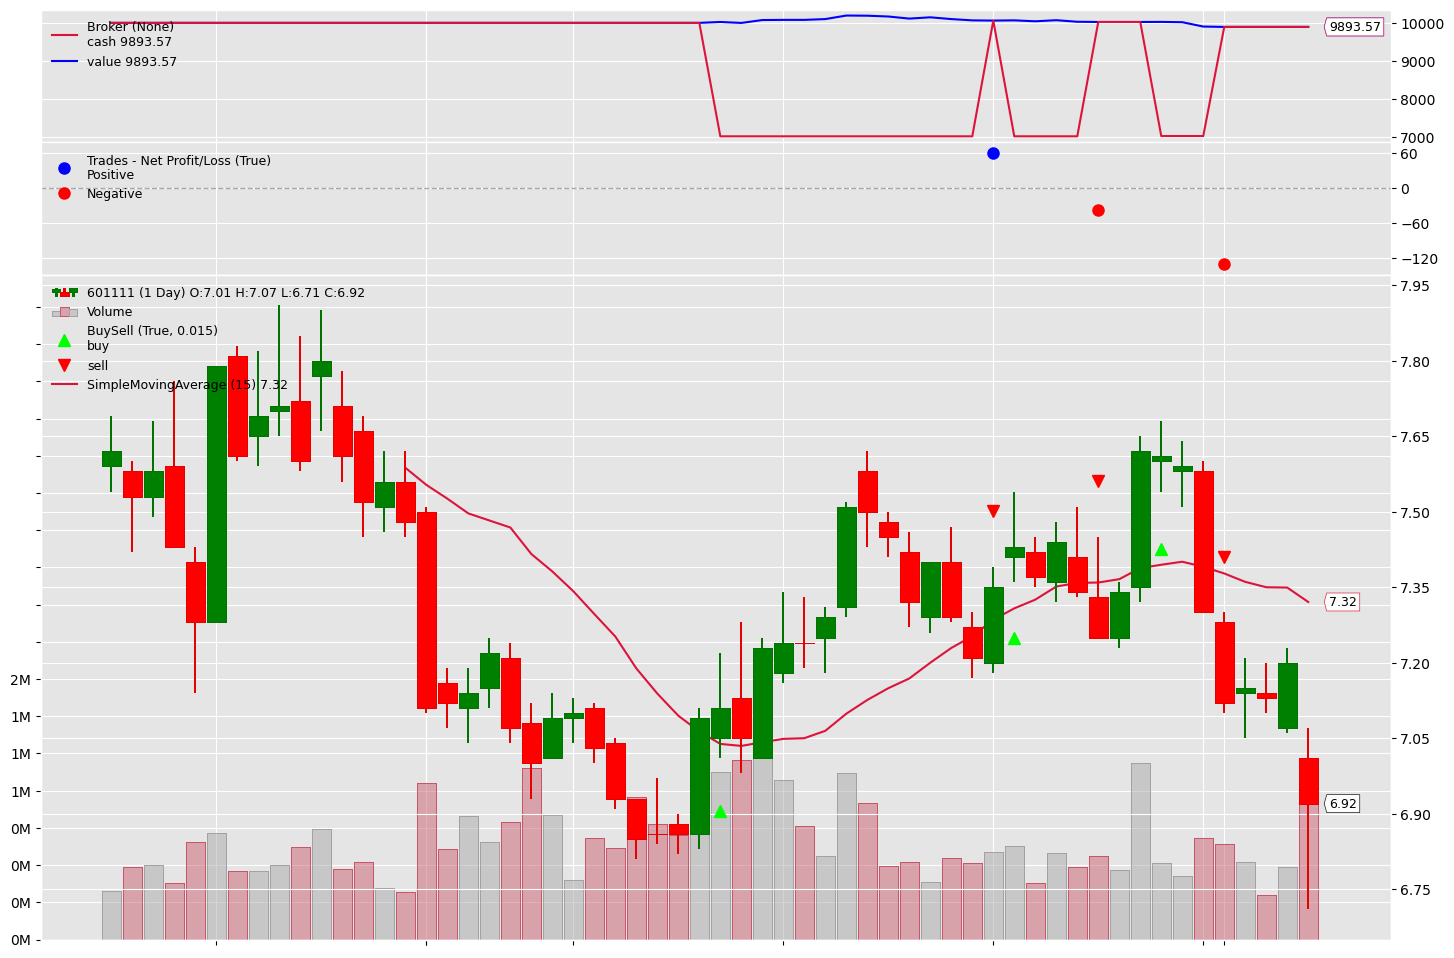

绘图错误: 'list' object has no attribute 'show'


<IPython.core.display.Javascript object>

In [6]:
# from backtrader_plotting import Bokeh
# from backtrader_plotting.schemes import Tradimo

%matplotlib inline
import matplotlib
matplotlib.use('inline', force=False)  # 确保使用inline后端，但不强制切换

cerebro = bt.Cerebro()

# 将DataFrame转换为backtrader格式
df_backtrader = df_ts.copy()
# 将列名转换为小写
df_backtrader = df_backtrader.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
})
# 添加openinterest列（backtrader需要）
df_backtrader['openinterest'] = 0
# 只保留backtrader需要的列
df_backtrader = df_backtrader[['open', 'high', 'low', 'close', 'volume', 'openinterest']]

# 创建backtrader的PandasData对象
stock_value = bt.feeds.PandasData(dataname=df_backtrader)

# 读取数据
cerebro.adddata(stock_value, name="601111")

# 读取策略
cerebro.addstrategy(SMAStrategy)

cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name = "sharpe")
cerebro.addanalyzer(bt.analyzers.DrawDown, _name = "drawdown")

# 设置初始资金
cerebro.broker.setcash(10000)
# 设置佣金
cerebro.broker.setcommission(commission=0.0006)
# 设置购买比例
cerebro.addsizer(bt.sizers.PercentSizer, percents=30)

result = cerebro.run()

print("夏普比率分析结果:", result[0].analyzers.sharpe.get_analysis()['sharperatio'])
print("最大回撤分析结果:", result[0].analyzers.drawdown.get_analysis()['drawdown'])

# 设置绘图参数
plt.rcParams.update({
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'figure.figsize': (15, 10)  # 设置图形大小
})

# 绘制图表 - 使用plot参数确保显示
try:
    figs = cerebro.plot(style='candle', barup='green', bardown='red', volume=True, 
                        iplot=False,  # 在Jupyter中设置为False
                        show=False)   # 先不自动显示
    
    # 显式显示所有图形
    if figs:
        for fig in figs:
            if fig:
                fig.show()  # 显示图形
                plt.show()  # 确保显示
except Exception as e:
    print(f"绘图错误: {e}")
    # 如果上面的方法不行，尝试直接plot
    figs = cerebro.plot(style='candle', barup='green', bardown='red', volume=True)
    plt.show()